<a href="https://colab.research.google.com/github/teooi/banana-brain-project/blob/main/brain_moment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download dependencies**

In [ ]:
!pip install bids
!pip install nibabel
!pip install openneuro-py
!pip install nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=70cd760871e70903689bc10a46b3f22507284c59f484b5b347a9f0b2f0e80a5c
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.6/81.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

**Download fMRI dataset of one subject during REM**



In [ ]:
import openneuro as on
!openneuro-py download --dataset=ds003768 --target-dir=data/bids --include=sub-01

Streaming output truncated to the last 5000 lines.


sub-01_task-sleep_run-2_eeg.eeg:  10% 29.9M/287M [00:11<02:10, 2.07MB/s]
sub-01_task-sleep_run-3_eeg.eeg:   6% 17.1M/283M [00:06<02:13, 2.08MB/s]

sub-01_task-rest_run-1_eeg.eeg:  14% 35.7M/247M [00:12<01:43, 2.14MB/s]


sub-01_task-sleep_run-1_eeg.eeg:  11% 30.7M/285M [00:11<02:02, 2.17MB/s]



sub-01_task-sleep_run-2_eeg.eeg:  11% 30.2M/287M [00:11<02:07, 2.11MB/s]
sub-01_task-sleep_run-3_eeg.eeg:   6% 17.4M/283M [00:07<02:14, 2.07MB/s]

sub-01_task-rest_run-1_eeg.eeg:  15% 36.0M/247M [00:12<01:31, 2.43MB/s]


sub-01_task-sleep_run-1_eeg.eeg:  11% 31.0M/285M [00:11<01:48, 2.45MB/s]



sub-01_task-sleep_run-2_eeg.eeg:  11% 30.7M/287M [00:11<01:35, 2.82MB/s]
sub-01_task-sleep_run-3_eeg.eeg:   6% 17.9M/283M [00:07<01:31, 3.04MB/s]

sub-01_task-rest_run-2_eeg.eeg:  17% 33.2M/191M [00:12<00:54, 3.07MB/s]


sub-01_task-rest_run-1_eeg.eeg:  15% 36.5M/247M [00:13<01:16, 2.87MB/s]



sub-01_task-sleep_run-2_eeg.eeg:  11% 31.0M/287M [00:11<0

Importing brain masks from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing data in bids format

In [ ]:
from bids import BIDSLayout, BIDSValidator
import os
import numpy as np

data_dir = '/content/data/bids'
layout = BIDSLayout(data_dir, derivatives=True, validate=False)
layout

/usr/local/lib/python3.10/dist-packages/bids/layout/layout.py:516: UserWarning: Derivative indexing was requested, but no valid datasets were found in the specified locations ([PosixPath('/content/data/bids/derivatives')]). Note that all BIDS-Derivatives datasets must meet all the requirements for BIDS-Raw datasets (a common problem is to fail to include a 'dataset_description.json' file in derivatives datasets).
Example contents of 'dataset_description.json':
{"Name": "Example dataset", "BIDSVersion": "1.0.2", "GeneratedBy": [{"Name": "Example pipeline"}]}
  warnings.warn("Derivative indexing was requested, but no valid "


BIDS Layout: .../content/data/bids | Subjects: 1 | Sessions: 0 | Runs: 3

In [ ]:
# layout.getsubjects()

In [ ]:
layout.get_task()

['rest', 'sleep']

In [ ]:
layout.to_df()

entity,path,datatype,extension,run,subject,suffix,task
0,/content/data/bids/dataset_description.json,NaN,.json,NaN,NaN,description,NaN
1,/content/data/bids/sub-01/anat/sub-01_T1w.json,anat,.json,NaN,01,T1w,NaN
2,/content/data/bids/sub-01/anat/sub-01_T1w.nii.gz,anat,.nii.gz,NaN,01,T1w,NaN
3,/content/data/bids/sub-01/eeg/sub-01_task-rest...,eeg,.eeg,1,01,eeg,rest
4,/content/data/bids/sub-01/eeg/sub-01_task-rest...,eeg,.vhdr,1,01,eeg,rest
5,/content/data/bids/sub-01/eeg/sub-01_task-rest...,eeg,.vmrk,1,01,eeg,rest
6,/content/data/bids/sub-01/eeg/sub-01_task-rest...,eeg,.eeg,2,01,eeg,rest
7,/content/data/bids/sub-01/eeg/sub-01_task-rest...,eeg,.vhdr,2,01,eeg,rest
8,/content/data/bids/sub-01/eeg/sub-01_task-rest...,eeg,.vmrk,2,01,eeg,rest
9,/content/data/bids/sub-01/eeg/sub-01_task-slee...,eeg,.eeg,1,01,eeg,sleep


In [ ]:
import nibabel as nib
import os.path

t1_files = layout.get(subject='01', suffix='T1w', return_type='file', extension='.nii.gz')[0]
t1 = nib.load(t1_files)

bold_mni_img_files = layout.get(subject='01', suffix='bold', return_type='file', extension='.nii.gz')[0]
bold_mni_img = nib.load(bold_mni_img_files)

In [ ]:
bold_mni_img.shape

(80, 80, 35, 286)

In [ ]:
header = t1.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 192 256 256   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.9999971 1.        1.        2.3       0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=2.3;Time=141928.672;phase=1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.019383237
quatern_c       : -0.018774914
quatern_d       : -0.041582596
qoffset_x     

Data for orientation of the image in space. This can be represented as the affine matrix, which can be used to transform images between different spaces.

In [ ]:
t1.affine

array([[ 9.95833874e-01,  8.23351145e-02, -3.91156711e-02,
        -1.05659637e+02],
       [-8.37905407e-02,  9.95790362e-01, -3.71573940e-02,
        -1.07510651e+02],
       [ 3.58915478e-02,  4.02802341e-02,  9.98543561e-01,
        -1.41255493e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

**Anatomical data plotting**

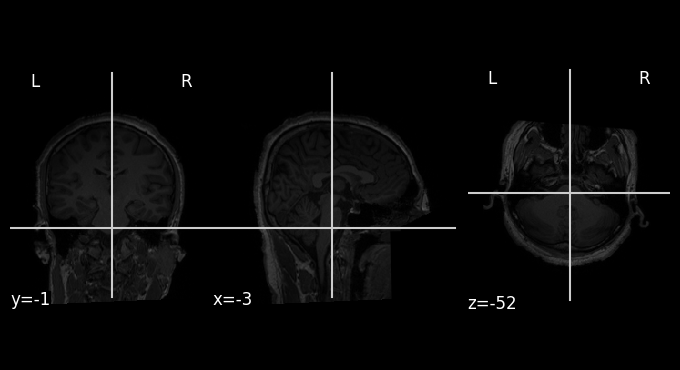

In [ ]:
%matplotlib inline

from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi

plot_anat(t1)

Image manipulation examples

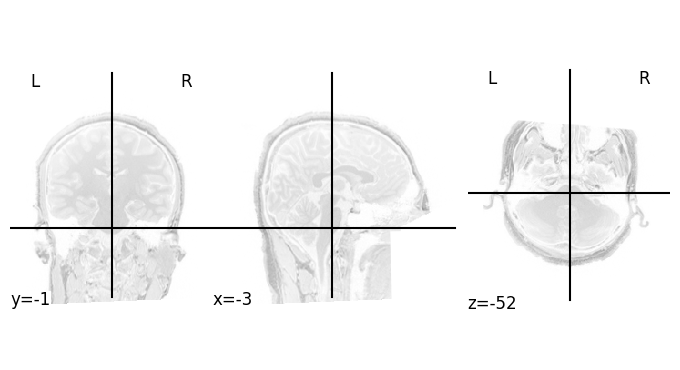

In [ ]:
from nilearn import image as img
t1_img = img.load_img(t1)

invert_img = img.math_img("-a", a = t1_img)
plot_anat(invert_img)

Condition Expressions example

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:293: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



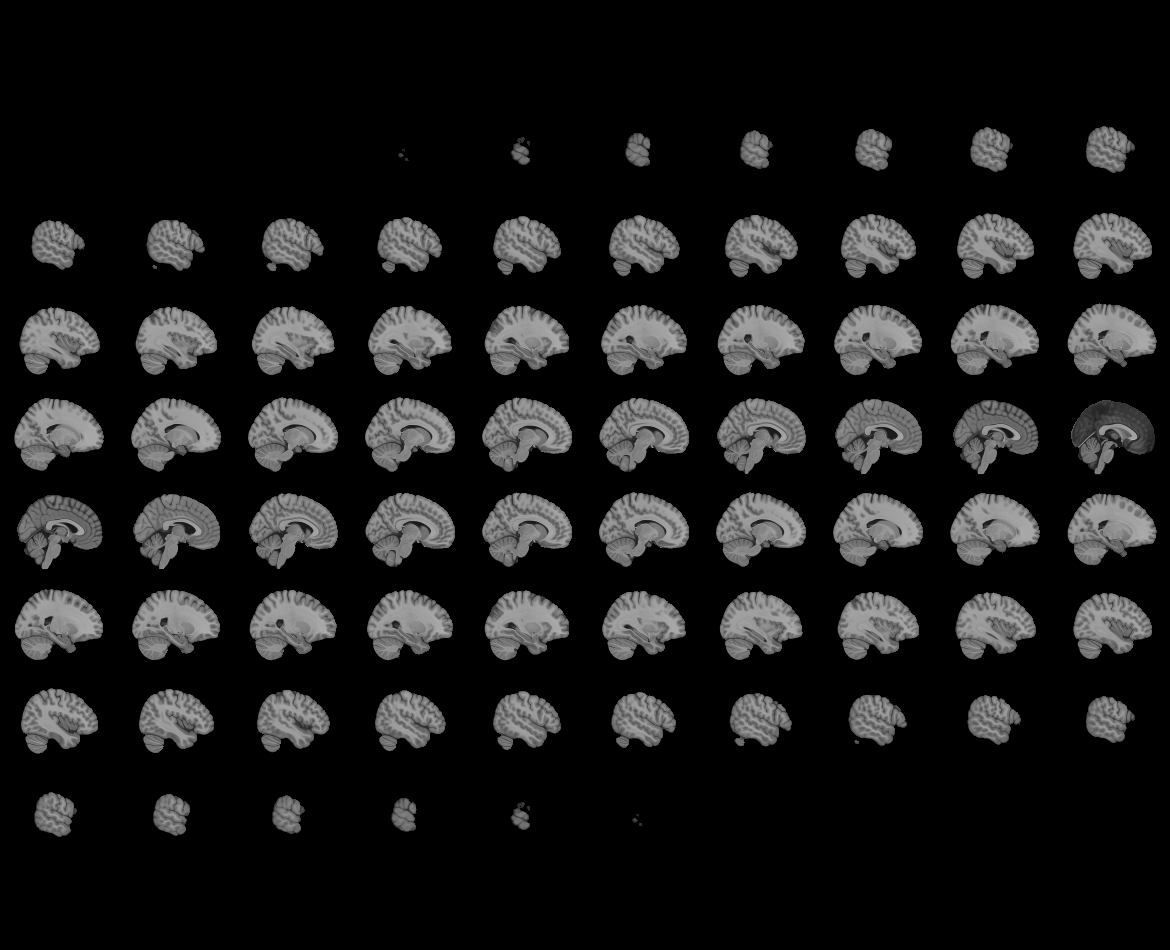
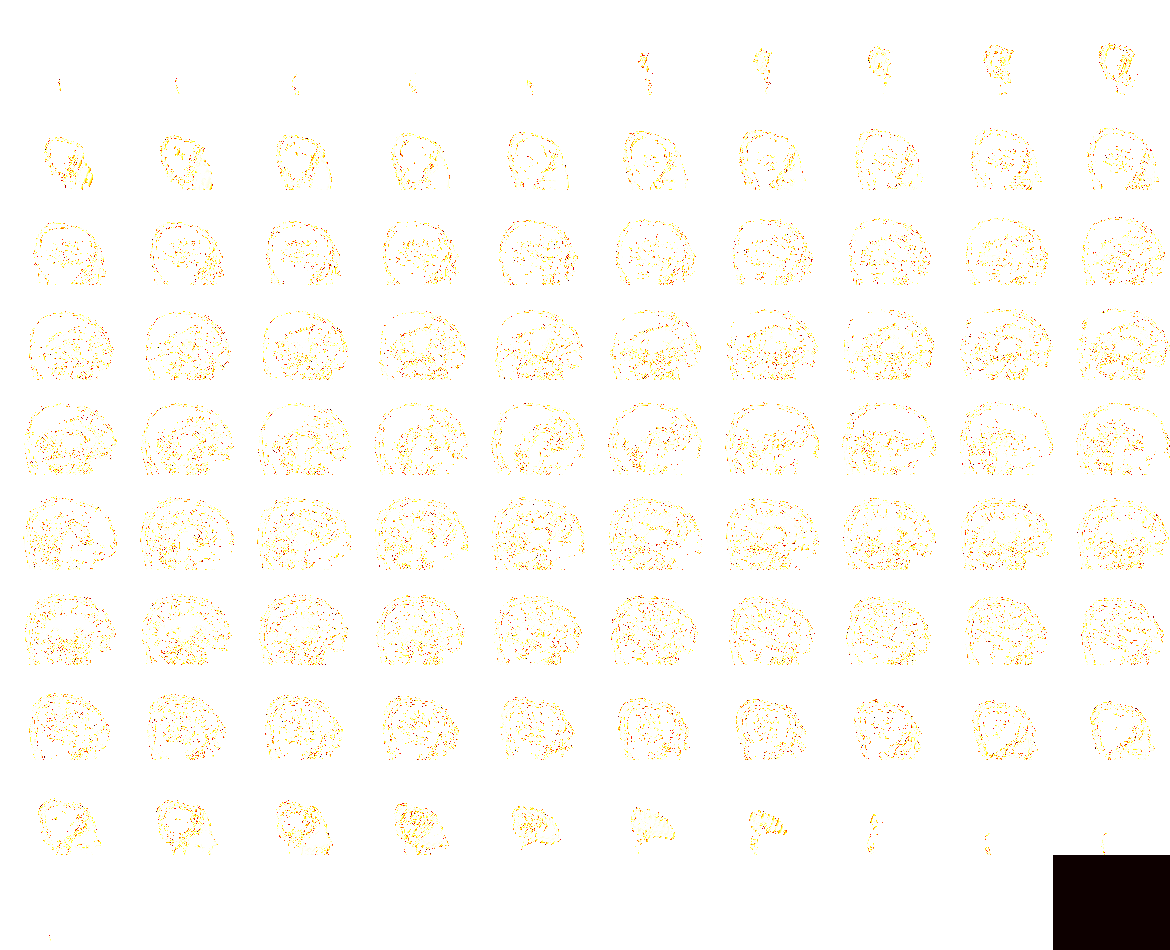

In [ ]:
t1_test = img.math_img("a > 260", a = t1_img)
view_img(t1_test)
# plot_anat(t1_test)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



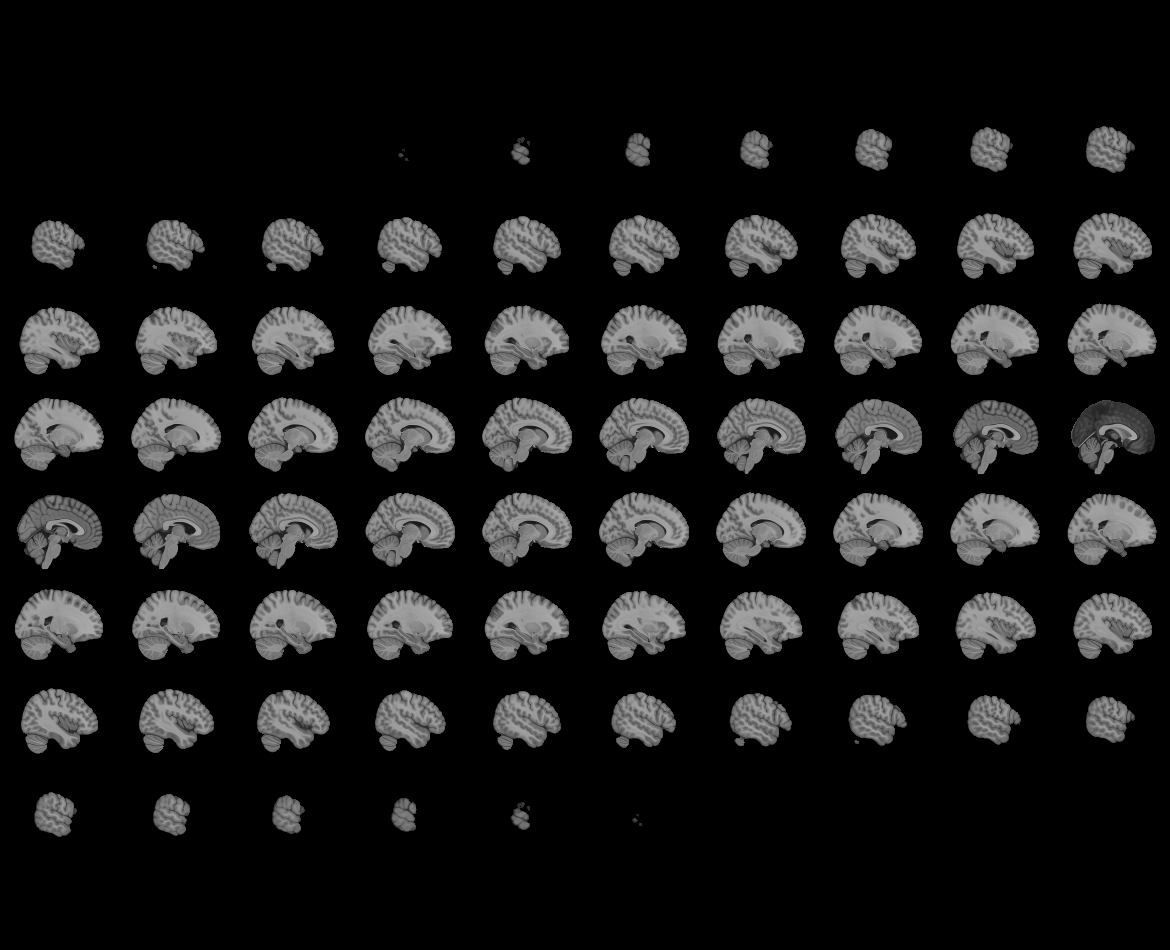
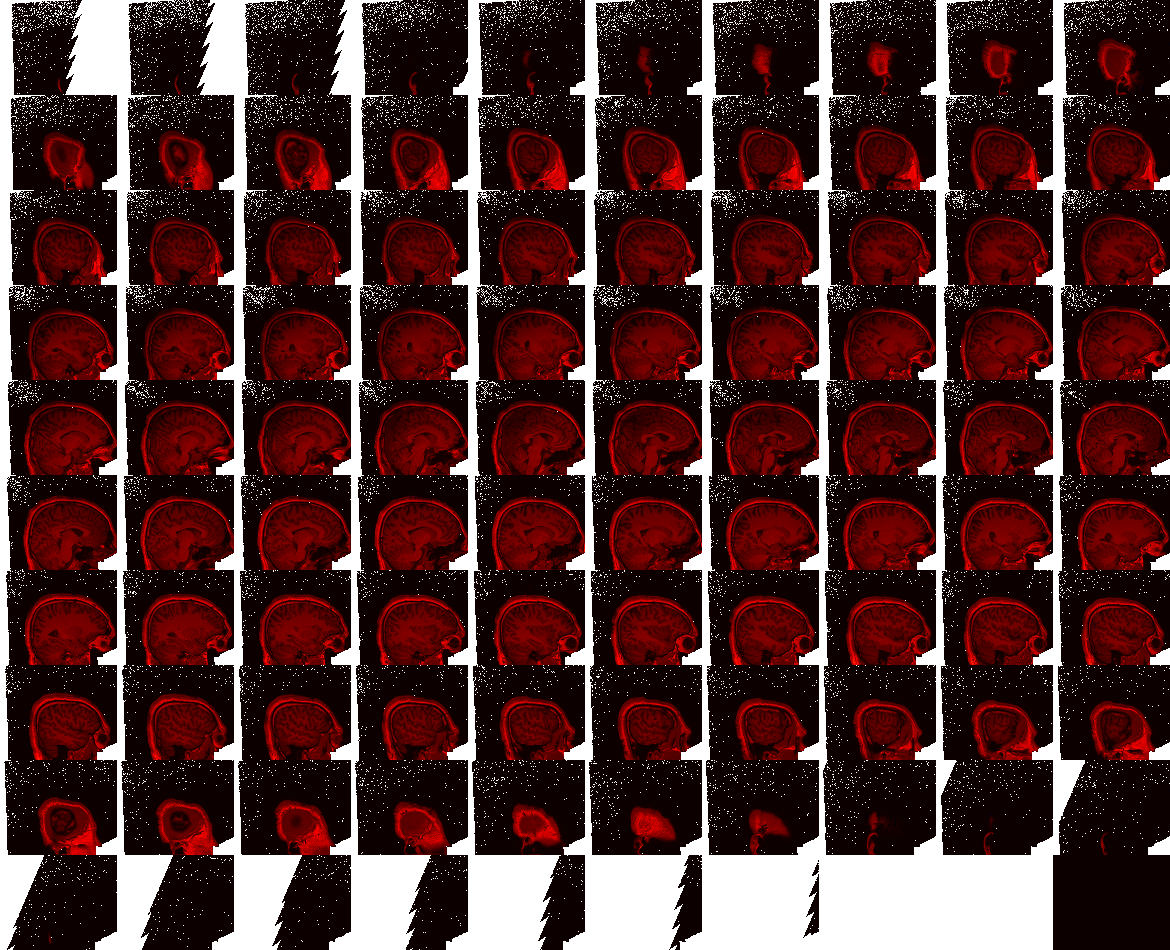

In [ ]:
view_img(t1)

**Bold signal reading**

/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


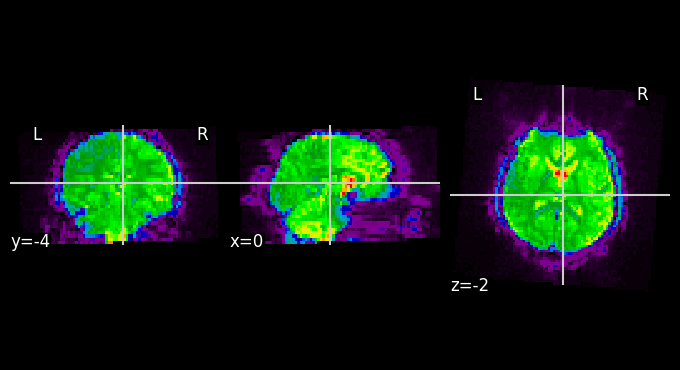

In [ ]:
func_vol5 = bold_mni_img.slicer[:,:,:,4]
plot_epi(func_vol5)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/usr/local/lib/python3.10/dist-packages/nilearn/image/resampling.py:756: UserWarning: Casting data from int32 to float32
  return resample_img(



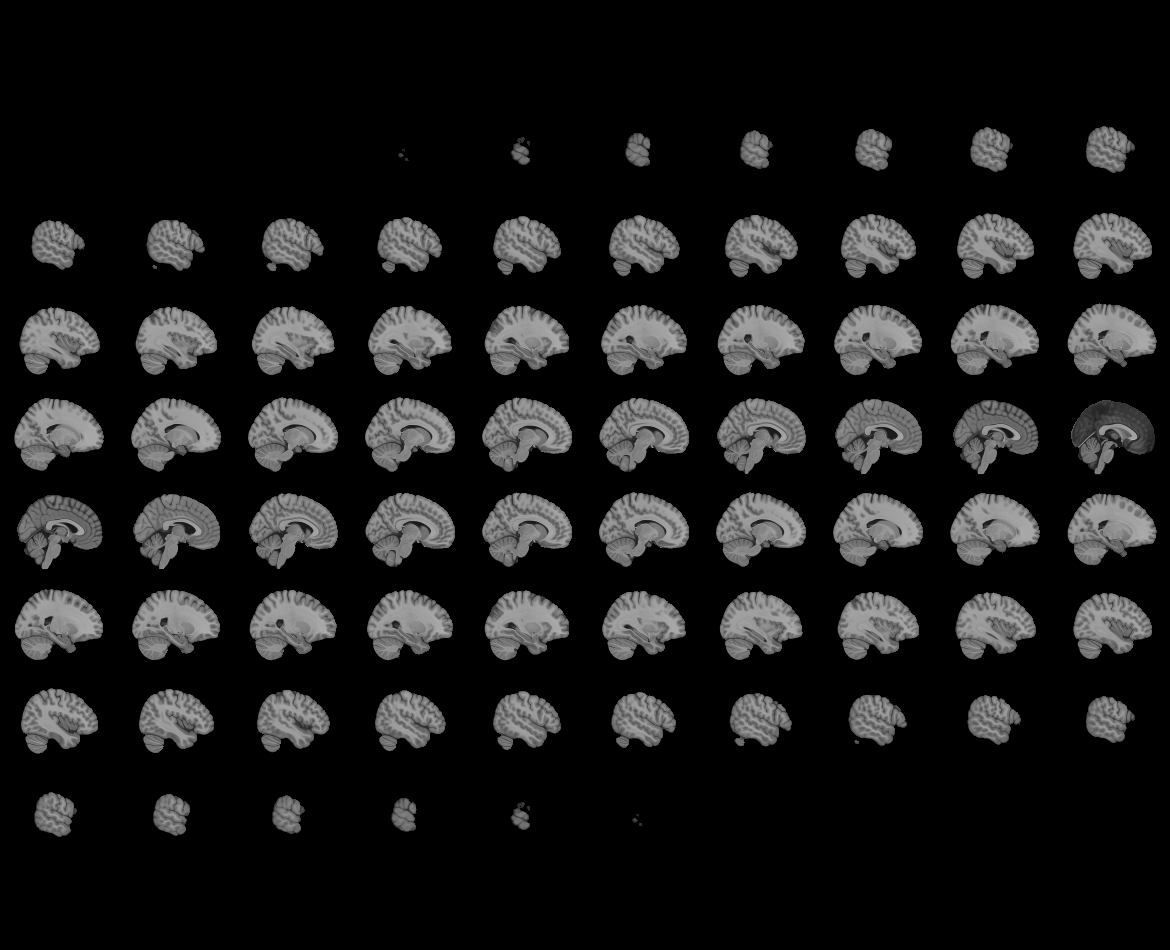
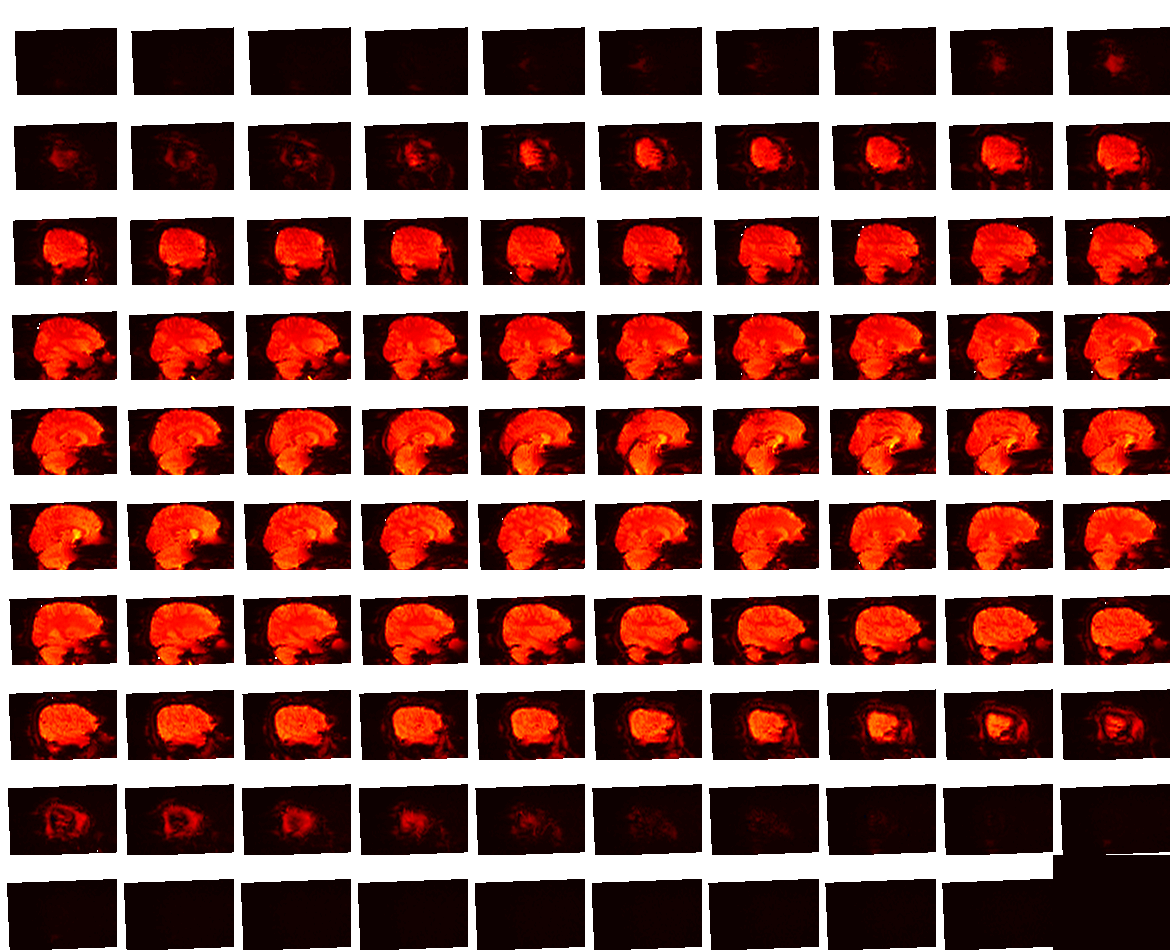

In [ ]:
view_img(func_vol5)

In [ ]:
single_voxel = bold_mni_img.slicer[40:50,30:40,30:40,:].get_data()
single_voxel.shape

<ipython-input-20-e9fef60c7e87>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  single_voxel = bold_mni_img.slicer[40:50,30:40,30:40,:].get_data()


(10, 10, 5, 286)

Text(0, 0.5, 'Bold Signal')

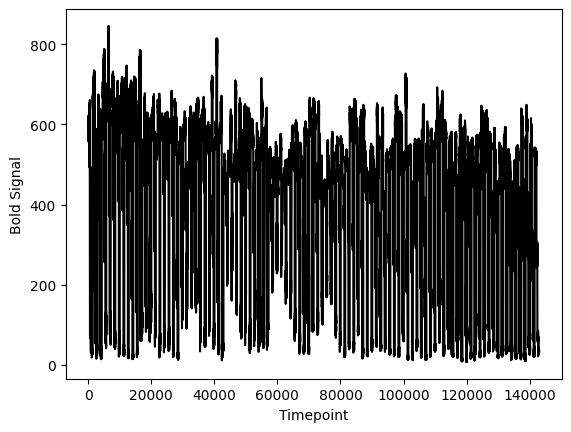

In [ ]:
import matplotlib.pyplot as plt

single_voxel = single_voxel.flatten()
plt.plot(np.arange(0, single_voxel.shape[0]), single_voxel, "k")
plt.xlabel("Timepoint")
plt.ylabel("Bold Signal")

**Resampling set**

In [ ]:
t1_mni_img = img.load_img(t1)

print(t1_mni_img.shape)
print(bold_mni_img.shape)

(192, 256, 256)
(80, 80, 35, 286)


In [ ]:
resamp_t1 = img.resample_to_img

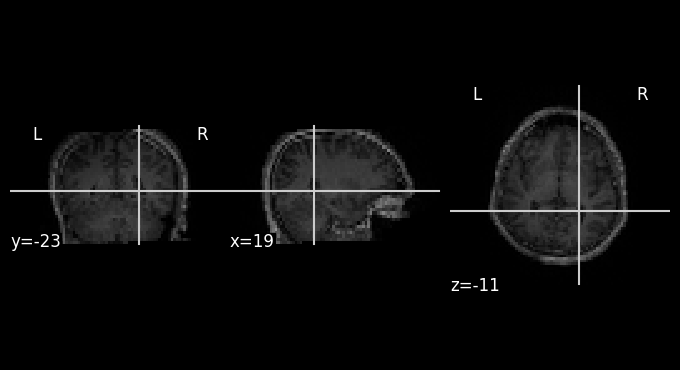

In [ ]:
resample_t1 = img.resample_to_img(source_img = t1_mni_img, target_img = bold_mni_img, interpolation="nearest")
plot_anat(resample_t1)

**Atlases** (wip)
- we will use mdsl which defines probabilistics across ROIs

In [ ]:
from nilearn import datasets

mdsl_atlas = datasets.fetch_atlas_msdl(data_dir=data_dir)

msdl_coords = mdsl_atlas.region_coords
n_regions = len(msdl_coords)

print(f"MSDL has {n_regions} ROIs")


Added README.md to /content/data/bids


Dataset created in /content/data/bids/msdl_atlas

MSDL has 39 ROIs


 ...done. (1 seconds, 0 min)
Extracting data from /content/data/bids/msdl_atlas/8eaecb9e05c478f565847000d9902a25/MSDL_rois.zip..... done.
